In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_l = pd.read_csv(r'C:\Users\Asus\Downloads\movie_data\links.csv')
df_t = pd.read_csv(r"C:\Users\Asus\Downloads\movie_data\tags.csv")
df_m = pd.read_csv(r"C:\Users\Asus\Downloads\movie_data\movies.csv")
df_r = pd.read_csv(r"C:\Users\Asus\Downloads\movie_data\ratings.csv")

### 1)What is the shape of "movies.csv"?


In [6]:
df_m.shape

(9742, 3)

### 2)What is the shape of "ratings.csv"?

In [5]:
df_r.shape

(100836, 4)

### 3)How many unique "userId" are available in "ratings.csv"?

In [13]:
df_r['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

### 4)Which movie has recieved maximum number of user ratings?

In [95]:
val_count = df_r['movieId'].value_counts()
id_max = val_count.idxmax()
max_rm = df_m[df_m['movieId'] == id_max ]['title']
max_rm

314    Forrest Gump (1994)
Name: title, dtype: object

### 5)Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [36]:
df_m[df_m['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [43]:
df_t[df_t['movieId']==2571]['tag'].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

### 6)What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [46]:
df_m[df_m['title']=="Terminator 2: Judgment Day (1991)"]

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [50]:
df_term = df_r[df_r['movieId']==589]['rating'].mean()

In [52]:
df_term['rating'].mean()

3.970982142857143

### 7)How does the data distribution of user ratings for "Fight Club (1999)" movie looks like

In [54]:
df_m[df_m['title']=="Fight Club (1999)"]

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [55]:
df_fc=df_r[df_r['movieId']==2959]

C:\Users\Asus\AppData\Local\Temp\ipykernel_11512\611164753.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_fc,x=df_fc['rating'],shade=True)


<Axes: xlabel='rating', ylabel='Density'>

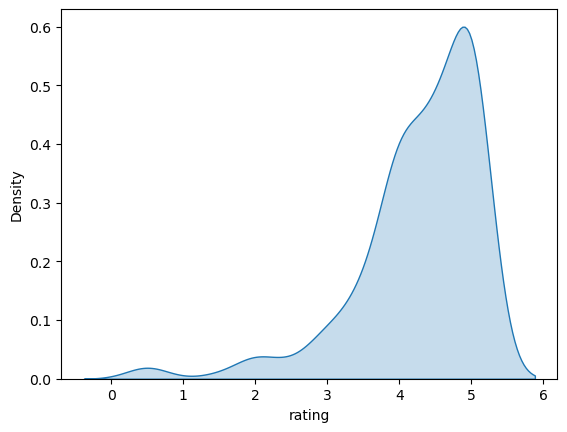

In [58]:
sns.kdeplot(data=df_fc,x=df_fc['rating'],shade=True)

In [75]:
df_mr=df_r.groupby('movieId')['rating'].agg(['count','mean']).reset_index()

In [76]:
df_m_r = pd.merge(df_m,df_mr,on='movieId',how='inner')

In [77]:
df_m_r = df_m_r[df_m_r['count']>50]

### Which movie is the most popular based on  average user ratings?


In [83]:
df_m_r['mean'].max()

4.429022082018927

In [82]:
df_m_r[df_m_r['mean']==4.429022082018927]

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [85]:
df_m_r.sort_values(by='count',ascending=False).head()

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [89]:
df_scfi = df_m_r[df_m_r['genres'].str.contains('Sci-Fi')]

In [92]:
df_scfi.sort_values(by='count',ascending=False).head()

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640


In [106]:
import requests
import numpy as np
from bs4 import BeautifulSoup

In [107]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [115]:
imdb = pd.merge(df_m_r,df_l,on='movieId')

In [117]:
imdb['imdbRatings'] = imdb['imdbId'].apply(scrapper)

In [122]:
imdb

,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRatings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


### Mention the movieId of the movie which has the highest IMDB rating.


In [124]:
imdb.sort_values(by='imdbRatings',ascending=False).head(1)

,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRatings
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3


### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [126]:
imdb_sc = imdb[imdb['genres'].str.contains('Sci-Fi')]

In [128]:
imdb_sc.sort_values(by='imdbRatings',ascending=False).iloc[0]

movieId                                                  79132
title                                         Inception (2010)
genres         Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
count                                                      143
mean                                                  4.066434
imdbId                                                 1375666
tmdbId                                                 27205.0
imdbRatings                                                8.8
Name: 424, dtype: object